In [1]:
import pandas as pd
import sqlite3

In [2]:
xls1 = pd.ExcelFile('alisultanova.xlsx')
ali = pd.read_excel(xls1, 'all')

In [3]:
xls2 = pd.ExcelFile('sulejmanov.xlsx')
sul_nouns = pd.read_excel(xls2, 'nouns')
sul_verbs = pd.read_excel(xls2, 'verbs')
sul_other = pd.read_excel(xls2, 'other')

In [4]:
# Я работаю над словарём андийского языка. 
# Есть старые лексикографические диссертации (Алисултанова) и (Сулейманов), которые я перевожу в вид таблиц. 
# Для (Алисултанова) это 1 таблица, а для (Сулейманов) 3 - для глаголов, существительных и всего остального 
# (т.к. нужны разные типы форм для сущ. и глаголов, соответственно набор столбцов разный). 
# Слова в таблицах из (Алисултанова) и (Сулейманов) могут совпадать.

In [5]:
conn = sqlite3.connect('andi_dict.db')

In [6]:
c = conn.cursor()

In [50]:
# Создаю таблицу на основе работы (Алисултанова), вношу в неё данные
c.execute("DROP TABLE IF EXISTS ali")
c.execute("CREATE TABLE IF NOT EXISTS ali(слово text, перевод text, примеры text, комментарии text, источник text)")
for i, row in ali.iterrows():
    c.execute("INSERT INTO ali VALUES (?, ?, ?, ?, ?)", (row["слово"], row["перевод"], row["примеры"], row["комментарии"], row["источник"]))

In [51]:
# Смотрю, получилось ли
for row in c.execute('SELECT * FROM ali'):
    print(row)

('(ц1а) рик1уду', 'гореть', None, None, 'Алисултанова 2009')
('t1игъгъу', 'крошечный', None, None, 'Алисултанова 2009; 2010')
('аба', 'широкий халат, плащ', None, 'араб.', 'Алисултанова 2009')
('абада', 'нареч. никогда, ни за что, ни при каких обстоятельствах', None, None, 'Алисултанова 2009; 2010')
('абахор ', 'опухоль', None, None, 'Алисултанова 2009')
('аббареги', 'изгой, беглец, чужак, отверженный', None, 'перс.', 'Алисултанова 2009; 2010')
('аббарегилъир', 'проживание (странствие) в чужом краю', None, 'авар.', 'Алисултанова 2009')
('аббасси ', 'монета в 20 копеек', None, 'перс.', 'Алисултанова 2009')
('абдал', 'дурной, глупый, сумасшедший', None, 'авар. < араб. ', 'Алисултанова 2009; 2010')
('абдаллъир', 'глупость, безумие', None, 'авар.', 'Алисултанова 2009')
('абжаб', 'начатый', None, None, 'Алисултанова 2009; 2010')
('абжаб', 'смешанный', None, None, 'Алисултанова 2009; 2010')
('абжиду', 'начать', None, None, 'Алисултанова 2009; 2010')
('аблълъин', 'похожий', 'авлълъин вошо ‘по

('гурмендо ', 'тонкий шелковый платок', None, 'перс.', 'Алисултанова 2009')
('гурунну', 'свернуть (что-либо)', None, None, 'Алисултанова 2009; 2010')
('гучи', 'мощь', None, None, 'Алисултанова 2009; 2010')
('гущи ', 'курица (детск.)', None, None, 'Алисултанова 2009')
('гущи-гущи', 'возглас, которым подзывают курицу', None, None, 'Алисултанова 2009')
('гъаб', 'толстый', None, None, 'Алисултанова 2009')
('Гъагъулъ', 'Гагатль', None, None, 'Алисултанова 2009')
('гъадил', 'летнее помещение для животных', None, None, 'Алисултанова 2009')
('гъадолла ', 'на реке', None, None, 'Алисултанова 2009')
('гъадор', 'речка', None, None, 'Алисултанова 2009; 2010')
('гъадорхо ', 'к реке', None, None, 'Алисултанова 2009')
('гъаду ', 'блеять', None, None, 'Алисултанова 2009')
('гъажу', 'рука (от кисти до плеча) // рука (от локтя до кисти), предплечье', None, 'авар.', 'Алисултанова 2009; 2010')
('гъажу бехун', 'плечо', None, None, 'Алисултанова 2009')
('гъазаввати', 'священная война', None, 'араб.', 'Алису

('к1ик1им ', 'помёт', None, None, 'Алисултанова 2009')
('к1к1вабду', '1) ударять; 2) жалить; 3) бить; 4) забивать; 5) вколачивать; 6) косить; 7) выбивать; 8) расстрелять; 9) убивать', None, None, 'Алисултанова 2009')
('к1к1вагьал', 'лентяй, ленивый', None, 'авар.', 'Алисултанова 2009')
('к1к1вагьаллъиду', 'лентяйничать, лениться', None, None, 'Алисултанова 2009')
('к1к1вагьаллъир', 'лень, леность', None, 'авар.', 'Алисултанова 2009')
('к1ок1он ', 'смесь измельченной мякины, сена', None, None, 'Алисултанова 2009')
('к1ол', 'вход', None, 'авар.', 'Алисултанова 2009')
('к1ол', 'дырка, дыра', None, None, 'Алисултанова 2009')
('к1ол', 'язык', None, None, 'Алисултанова 2009')
('к1ол', 'пост', None, None, 'Алисултанова 2009')
('к1олбуххволлу ', 'сверлить', None, None, 'Алисултанова 2009')
('к1оллариччиб ', 'бревно среднего ряда', None, None, 'Алисултанова 2009')
('к1олц1ир ', 'зерновой корм (для животных)', None, 'авар.', 'Алисултанова 2009')
('к1онкьа ', 'вилы', None, None, 'Алисултанова 200

('мигва', 'веретено', None, None, 'Алисултанова 2009')
('мигъаркьи', 'под хвостом', None, None, 'Алисултанова 2009; 2010')
('мигъаркьисси ', 'подхвостник', None, None, 'Алисултанова 2009')
('мигъгъвор', 'тмин', None, None, 'Алисултанова 2009; 2010')
('мигъерч1у', 'хвост', 'бочо мигъерч1уя ‘животное с коротким хвостом’, мигъерч1уссуб ‘бесхвостое животное’, мигъерч1у бошинну ‘завязывать хвост лошади’', None, 'Алисултанова 2009; 2010')
('мигъи', 'земледельческая округа // совокупность общественной земли аула', None, None, 'Алисултанова 2009; 2010')
('мигъул', 'спина', None, None, 'Алисултанова 2009; 2010')
('мигъулла ', 'сзади', None, None, 'Алисултанова 2009')
('мидил ', 'медаль', None, 'русск.', 'Алисултанова 2009')
('мижа', 'пятка', None, None, 'Алисултанова 2009; 2010')
('мижи ', 'глыба // круглый камень', None, None, 'Алисултанова 2009')
('мизам ', 'порядок', None, 'араб.', 'Алисултанова 2009')
('мийар', 'голова; заголовок', None, None, 'Алисултанова 2009; 2010')
('мийарек1ва // мияр

('т1урт1ул', 'блин', None, None, 'Алисултанова 2009; 2010')
('т1уши', 'свинец', None, None, 'Алисултанова 2009; 2010')
('туду', 'плюнуть', None, None, 'Алисултанова 2009; 2010')
('тукан', 'магазин', 'туканухво лIерди ‘к магазину’, туканухакку гьербади ‘от магазина’', 'араб.', 'Алисултанова 2009; 2010')
('тула', 'дряхлая собака', None, None, 'Алисултанова 2009; 2010')
('тумен', 'десятка; червонец; десятирублевая купюра', None, 'перс.', 'Алисултанова 2009; 2010')
('тупанги', '1) винтовка 2) лом // ружье', None, 'перс.', 'Алисултанова 2009; 2010')
('тупи', 'тюк ткани', None, None, 'Алисултанова 2009; 2010')
('тупли ', 'туфли ', None, 'русск.', 'Алисултанова 2009')
('тур', '1) острый соус из перца и соли; 2) рассол', None, None, 'Алисултанова 2009; 2010')
('турахъи', 'организатор церемоний у мюридов', None, None, 'Алисултанова 2009; 2010')
('турдиб', 'гнилой', None, None, 'Алисултанова 2009; 2010')
('турдоллу', 'сгноить', None, None, 'Алисултанова 2009; 2010')
('турду', 'сгнить', None, Non

('чирду', 'тронуть с места; начать движение', None, None, 'Алисултанова 2009; 2010')
('чирон', 'сталь', None, 'перс.', 'Алисултанова 2009; 2010')
('чиронгьинц1о ', 'гранит', None, None, 'Алисултанова 2009')
('чихит1и', 'возглас, используемый для того, чтобы отогнать щенка', None, None, 'Алисултанова 2009; 2010')
('чолтиду', 'проголодаться // голодать', None, None, 'Алисултанова 2009; 2010')
('чолтоб', 'голодный', None, None, 'Алисултанова 2009')
('чолтор', 'голод', None, None, 'Алисултанова 2009; 2010')
('чомло', 'несколько; немало', None, None, 'Алисултанова 2009; 2010')
('чомц1уло', 'не раз; не мало раз', None, None, 'Алисултанова 2009; 2010')
('чон', '1) зверь, дичь; 2) охота', None, 'авар.', 'Алисултанова 2009; 2010')
('чонгол', 'большая миска', None, None, 'Алисултанова 2009; 2010')
('чончи', 'хороший, хорошо', None, None, 'Алисултанова 2009')
('чончилъир ', 'великодушие', None, None, 'Алисултанова 2009')
('чор', 'конь', None, None, 'Алисултанова 2009')
('чора', 'толстый, жирный',

In [54]:
# Создаю таблицу с существительными на основе работы (Сулейманов), вношу в неё данные
c.execute("DROP TABLE IF EXISTS sul_nouns")
c.execute("CREATE TABLE IF NOT EXISTS sul_nouns(страница text, слово text, перевод text, класс text, pl text, obl text, пример text, комментарий text)")
for i, row in sul_nouns.iterrows():
    c.execute("INSERT INTO sul_nouns VALUES (?, ?, ?, ?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["класс"], row["pl"], row["obl"], row["пример"], row["комментарий"]))

In [55]:
# Создаю таблицы с глаголами и всем остальным на основе работы (Сулейманов), вношу в них данные
c.execute("DROP TABLE IF EXISTS sul_verbs")
c.execute("CREATE TABLE IF NOT EXISTS sul_verbs(страница text, слово text, перевод text, prs text, pst text, пример text, комментарий text)")
for i, row in sul_verbs.iterrows():
    c.execute("INSERT INTO sul_verbs VALUES (?, ?, ?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["prs"], row["pst"], row["пример"], row["комментарий"]))
c.execute("DROP TABLE IF EXISTS sul_other")
c.execute("CREATE TABLE IF NOT EXISTS sul_other(страница text, слово text, перевод text, пример text, комментарий text)")
for i, row in sul_other.iterrows():
    c.execute("INSERT INTO sul_other VALUES (?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["пример"], row["комментарий"]))

In [56]:
conn.commit()

In [11]:
# Можно добавлять новые вхождения из источников
#c.execute("INSERT INTO ali VALUES ('пример','пример', 'пример с примером', 'это только для примера', 'из головы')")

In [58]:
# Можно сортировать по странице в источнике 
for row in c.execute('SELECT * FROM sul_nouns ORDER BY страница'):
    print(row)

('100, 149', 'рокъир', 'мир, перемирие', 'III', None, None, None, None)
('100, 152', 'гьанарокьи', 'ласка', 'IV', None, None, None, None)
('102', 'буц1ц1ир', 'скот, имущество', None, None, None, None, None)
('102', 'къуну', 'увула', None, None, None, None, None)
('102, 139', 'ц1ц1уку', 'мех, шкура', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('103', 'инкубатур', 'инкубатор', None, None, None, None, None)
('103', 'инспектур', 'инспектор', None, None, None, None, None)
('103', 'лектур', 'лектор', None, None, None, None, None)
('103', 'тоххтур', 'доктор', None, None, None, None, None)
('103, 135', 'канжуртур // кондуктур', 'кондуктор', 'I/II', None, None, None, None)
('103, 136', 'директур // деректур', 'директор', 'I/II/IV', None, None, None, None)
('104', 'гъузи', 'грязь', None, None, None, None, None)
('104', 'тумар', 'спортивный массаж', None, None, None, None, None)
('104, 155', 'бишин // бищин', 'пахта', 'V', None, None, None, No

('155', 'л*ел', 'сметана', 'V', None, None, None, None)
('155', 'л*енщур', 'мука', 'V', None, None, None, None)
('155', 'лажбар', 'масляная краска', 'V', None, None, None, None)
('155', 'лак', 'лак', 'V', None, None, None, None)
('155', 'релъон', 'краска', 'V', None, None, None, None)
('155', 'хохой', 'жар, горячие угли', 'V', None, None, None, None)
('155', 'ч1ами', 'сыр', 'V', None, None, None, None)
('155', 'щакъ', 'чернила', 'V', None, None, None, None)
('155, 174', 'рикъинл1а', 'трава барана // род травы', 'V', 'рикъинл1ол', None, None, None)
('156', 'абчохол', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None)
('156', 'бот1илъир', 'темнота', 'V', None, None, None, None)
('156', 'гьааᴴроххул1 ц1ц1он', 'каменная соль (букв. ослинная соль)', 'V', None, None, None, None)
('156', 'гьац1аоᴴщ', 'мел (белая земля)', 'V', None, None, None, None)
('156', 'къгъаллир', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None)
('156

('44, 140', 'мич1ч1', 'крапива', 'III', None, None, None, None)
('44, 140, 168-169', 'памидур', 'помидор', 'III', 'памидурол', None, None, None)
('44, 140, 175', 'гьимкъгъва', 'съедобное корневище лопуха', 'III', '(г1абук1)-гьимкъгъол', None, None, None)
('44, 141, 169', 'ч1имч1ур', 'слива (особый сорт)', 'III', 'ч1имч1урол', None, None, None)
('44, 144, 169', 'мармар // мармор', 'мрамор', 'III', 'мармалол', None, None, None)
('44, 147', 'хъирим', 'крымское ружье', 'III', None, None, None, None)
('44, 148', 'ссаъат', 'часы', 'III', None, None, None, None)
('44, 150', 'арз', 'кляуза, жалоба, донесение', 'III', None, None, None, None)
('44, 152', 'анххвара', 'хомяк // суслик', 'IV', None, None, None, None)
('44, 152', 'гьайман', 'баран', 'IV', None, None, None, None)
('44, 154, 178', 'мигажу', 'борода', 'V', 'мигажойл', None, None, None)
('44, 156', 'анзи', 'снег', 'V', None, None, None, None)
('44, 156', 'ссаъат', 'час', 'V', None, None, None, None)
('44, 166', 'щомщол', 'свирель', None

('34, 168', 'анкол', 'кисточка горского тулупа (сагула)', None, 'анколол', None, None, None)
('44, 152', 'анххвара', 'хомяк // суслик', 'IV', None, None, None, None)
('33', 'анццирт1а', 'мята', None, None, None, None, None)
('135', 'анччиб', 'свидетель', 'I/II', None, None, None, None)
('37', 'анччйа', 'свидетель', None, None, None, None, None)
('133', 'арабйоллув', 'араб', 'I', None, None, None, None)
('134', 'арабйоллуй', 'арабка', 'II', None, None, None, None)
('147', 'арада', 'орудие', 'III', None, None, None, None)
('50', 'аргъван', 'мутность, помутнение', None, None, None, None, None)
('34', 'аржан', 'долото', None, None, None, None, None)
('146', 'аржан', 'кривой нож', 'III', None, None, None, None)
('44, 150', 'арз', 'кляуза, жалоба, донесение', 'III', None, None, None, None)
('46, 150', 'арза', 'заявление', 'III', None, None, None, None)
('148', 'арипмометр', 'арифмометр', 'III', None, None, None, None)
('34, 87, 94, 144', 'арком', 'ложка', 'III', 'аркоᴴйл', None, None, 'чан.,

('36, 157', 'кьину', 'зима', 'V', None, None, None, None)
('158', 'кьиру', 'вьючное седло осла', 'V', None, None, None, None)
('36, 53, 86', 'кьиру', 'мост', None, 'кьирдойл', 'эрг.п. мн.ч. лъирдвад', None, None)
('60', 'кьихон', 'сон', None, None, None, None, None)
('82', 'кьол', 'вражда', None, 'кьоллил', None, None, None)
('60, 138', 'кьонно', 'нога', 'III', None, None, None, None)
('43, 84, 142', 'кьук1ум // кьук1ун', 'помет', 'III', 'кьук1воᴴл', None, None, None)
('34, 89, 142', 'кьури', 'скала', 'III', 'кьурйол', 'эрг.п. мн.ч. кьурйад', None, None)
('53', 'кьурихъайб', 'расщелина', None, None, None, None, None)
('142', 'кьухху', 'полукустарное растение со стеблеобъемлющими листиками (напоминает шелковник), растет на сухих склонах гор, в сухом виде горит легко', 'III', None, None, None, None)
('62', 'кьухъурлъир', 'низина, низость', None, None, None, None, None)
('139', 'кьуццу', 'газ (человеческого и животного)', 'III', None, None, None, None)
('52, 85', 'л*авр', 'грудь', None, N

('55', 'ццу', 'вонь', None, None, None, None, None)
('54, 138', 'ццула', 'пищевод', 'III', None, None, None, None)
('41, 153', 'ццут1и', 'жук (навозный)', 'IV', None, None, None, None)
('54, 141, 167', 'ццуццул', 'пирамидальный тополь', 'III', 'ццуццулол', None, None, None)
('58, 89, 144', 'ч1аар // ч1ар', 'глина, глиняный пол, площадь', 'III', None, None, None, 'ав., чан., зил. ч1абар')
('144', 'ч1аат1', 'сера', 'III', None, None, None, None)
('39', 'ч1абат1', 'сера', None, None, None, None, None)
('39, 140, 167', 'ч1абдил', 'мягкая болотная трава', 'III', 'ч1абдилол', None, None, None)
('50, 141', 'ч1агъва', 'солома (крупная)', 'III', None, None, None, None)
('40, 143, 167', 'ч1адил', 'развалина', 'III', 'ч1адилол', None, None, None)
('61, 152', 'ч1акъгъвара', 'перепел, перепелка', 'IV', None, None, None, None)
('45, 140', 'ч1алк1ут1ан // ч1ак1улт1ан', 'свекла', 'III', None, None, None, None)
('133', 'ч1амалав', 'чамалиец', 'I', None, None, None, None)
('134', 'ч1амалай', 'чамалинка'

In [60]:
# Можно сортировать по алфавиту (и в обратном порядке, заменив ASC на DESC)
for row in c.execute('SELECT * FROM sul_nouns ORDER BY слово ASC'):
    print(row)

('171', '(исивл1) рохъ', 'ребро', None, '(исивл1) рохъол', None, None, None)
('147, 171', '(масуй) чарухъ', '(сафьяновая) галоша', 'III', '(масвол) чарухъол', None, None, None)
('154', '(мйаъарул1) л1уол1а', 'мозг (головной)', 'V', None, None, None, None)
('154', '(моч1ищур) гьакъу', 'матка', 'V', '(моч1иллур) гьакъойл (1 кл.), моч1иллил1 гьакъойл (2 кл.)', None, None, None)
('98', '*овхх', 'баюканье', None, None, None, None, None)
('55', 'Буцур', 'название горы', None, None, None, None, None)
('43, 160', 'аба', 'плащ (мужской и женский)', 'V', None, None, None, None)
('135', 'аббарег', 'пришелец', 'I/II', None, None, None, None)
('106, 150', 'абжар', 'сложение', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('133', 'абххазйоллув', 'абхазец', 'I', None, None, None, None)
('134', 'абххазйоллуй', 'абхазка', 'II', None, None, None, None)
('156', 'абчохол', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None

('51, 134, 169', 'йохор', 'бабушка, старуха', 'II', 'йохорол', None, None, None)
('53, 99', 'йоцц', 'сестра', None, 'йоццбол', None, 'сей йоцц - одна сестра, йигьолгу йоццбол - много сестёр (с. 162)', None)
('50', 'йургъа', 'иноходь', None, None, None, None, None)
('42', 'к1ак1к1у', 'волчок', None, None, None, None, None)
('144', 'к1ала', 'нары (из камней), лежанка', 'III', None, None, None, None)
('160', 'к1ант1а', 'посох (и палка)', 'V', None, None, None, None)
('150', 'к1вар', 'внимание', 'III', None, None, None, None)
('42, 94, 172', 'к1ик1им', 'помет', None, 'к1ик1йоᴴл // к1ик1иоᴴл', None, None, 'чан., зил. к1ик1имол')
('159', 'к1икъгъи', 'чашка, плошка', 'V', None, None, None, None)
('160', 'к1иц1у', 'серьга', 'V', None, None, None, None)
('160', 'к1иц1у', 'крючок, петля', 'V', None, None, None, None)
('143', 'к1к1ааᴴра', 'арка, свод', 'III', None, None, None, None)
('27', 'к1к1ара', 'овод', None, 'к1к1араал', 'эрг к1к1араад', None, None)
('53, 153', 'к1к1ара', 'комар', 'IV', Non

('40, 87', 'ниду', 'ресница', None, 'нидойл', None, None, 'гаг. нидобил')
('45, 155', 'никку', 'мелкая солома // мякина', 'V', None, None, None, None)
('35, 138', 'нико', 'колено, нога', 'III', None, None, None, None)
('45, 139', 'ниха', 'овес', 'III', None, None, None, None)
('45', 'нич1а', 'овод', None, None, None, None, None)
('58, 153', 'нич1о', 'овод, слепень', 'IV', None, None, 'нич1оло - и овод (с. 78)', None)
('147', 'ничо', 'серп, коса', 'III', None, None, None, None)
('158', 'нищу', 'кривая часть сохи', 'V', None, None, None, None)
('45', 'ноджи', 'дуб', None, None, None, None, None)
('141', 'ножи', 'дуб', 'III', None, None, None, None)
('136', 'ноколл1у', 'друг', 'I/II/IV', None, None, None, None)
('150', 'норма', 'норма', 'III', None, None, None, None)
('45, 100, 153', 'ноц1ц1', 'вошь', 'IV', 'ноц1ц1ол', None, None, None)
('133', 'нугъаллув', 'ногаец', 'I', None, None, None, None)
('134', 'нугъаллуй', 'ногайка', 'II', None, None, None, None)
('144', 'нур', 'лунный свет, сол

('35, 88-89, 152', 'ч1ора', 'телка', 'IV', 'ч1орибдул // ч1орйадул', None, None, 'анд., гаг. мн. ч. ч1орибадул')
('150', 'ч1угьи', 'гордость', 'III', None, None, None, None)
('144', 'ч1ум', 'туча', 'III', None, None, None, None)
('158', 'ч1уриг', 'колесо', 'V', None, None, None, None)
('59', 'ч1ч1арир', 'скольжение', None, None, None, None, None)
('34, 58', 'ч1ч1е // ч1ч1ее', 'ясень', None, None, None, None, None)
('147', 'ч1ч1ем', 'корзина (маленькая)', 'III', None, None, None, None)
('147', 'ч1ч1епи', 'корзина (самая маленькая)', 'III', None, None, None, None)
('89, 142', 'ч1ч1иир // ч1ч1ииᴴр', 'гребень // гребень горы', 'III', None, None, None, 'анд., гаг. ч1чимир')
('45, 152, 174', 'ч1ч1ингъа', 'ворон // грач', 'IV', 'ч1ч1ингъол', None, None, None)
('54', 'ч1ч1ир', 'гребень горы, холма', None, None, None, None, None)
('59', 'ч1ч1ук1у', 'трус', None, None, None, None, None)
('45, 178', 'чагъана', 'горская скрипка  (в речи рикванинцев и гармошка) ', None, 'чагъанойл', None, None, Non

In [61]:
# Можно показать все существительные I класса (например)
for row in c.execute('SELECT слово FROM sul_nouns WHERE класс = "I"'):
    print(row)

('абххазйоллув',)
('аврег',)
('азирбейжаноллув',)
('аллагь',)
('арабйоллув',)
('ашоллав',)
('багвалов',)
('будалаъ',)
('будун',)
('бутайлум',)
('бутуруллув',)
('ваххдоб',)
('ваццъал',)
('вокьот1иннйа',)
('вокьусси',)
('вокьусси',)
('воцц',)
('вошо // вощо',)
('гуржйоллув',)
('гъагъоррав',)
('гъуннав',)
('гьек1а',)
('дада',)
('даргйоллув',)
('дибир',)
('зилурав',)
('зунурачи',)
('има',)
('имакьеру',)
('имам',)
('инххиллав',)
('ихум',)
('кашиш',)
('коххирав',)
('кунт1а',)
('къади',)
('къаличи',)
('къгъваннав',)
('лезгйоллув',)
('малайк',)
('меннав',)
('нартоллув',)
('нугъаллув',)
('нусо',)
('оруссиррав',)
('рик1к1унарав',)
('табасараноллув',)
('турколлув',)
('украйноллув',)
('хунчч',)
('хьиндалоллув',)
('ц1ц1унн*арав',)
('ч1амалав',)
('чохъурав',)
('эрменйоллув',)


In [62]:
#Можно найти слова, содержащие определённую последовательность символов
for row in c.execute('SELECT * FROM sul_nouns WHERE слово LIKE "%аб%"'):
    print(row)

('43, 160', 'аба', 'плащ (мужской и женский)', 'V', None, None, None, None)
('135', 'аббарег', 'пришелец', 'I/II', None, None, None, None)
('106, 150', 'абжар', 'сложение', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('133', 'абххазйоллув', 'абхазец', 'I', None, None, None, None)
('134', 'абххазйоллуй', 'абхазка', 'II', None, None, None, None)
('156', 'абчохол', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None)
('149', 'адаб', 'уважение', 'III', None, None, None, None)
('150', 'азаб', 'мучение', 'III', None, None, None, None)
('34, 88, 153', 'акъраб', 'скорпион', 'IV', 'акърайл', None, None, 'чан., зил. мн. ч. акърабил')
('133', 'арабйоллув', 'араб', 'I', None, None, None, None)
('134', 'арабйоллуй', 'арабка', 'II', None, None, None, None)
('134', 'баба', 'мама', 'II', None, None, None, None)
('48, 152, 170', 'бабущ', 'утка', 'IV', 'бабущол', None, None, None)
('44', 'вабаъ', 'холера', None, None, N

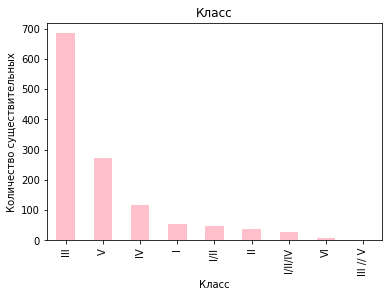

In [66]:
# График показывает распределение по классам существительных андийского языка, взятых из дисс. (Сулейманов).
import matplotlib.pyplot as plt
sul_nouns['класс'].value_counts().plot.bar(color='pink');
plt.title('Класс')
plt.xlabel('Класс')
plt.ylabel('Количество существительных');
# Большая часть существительных в таблице принадлежит 3 классу. Следующие по размеру группы - 4 и 5 класс. 3, 4, 5 класс отвечают за неживые предметы. Существительные 1 и 2 класса, обозначающие людей, составляют относительно небольшую часть существительных. 
# Однако, эти выводы трудно экстраполировать на весь андийский язык. Во-первых, не факт, что слова, упомянутые в диссертации, распределены по классам в таком же соотношении как в языке в целом. Во-вторых, ещё не все данные внесены в таблицу. 
#I/II класс - это существительные, обозначающие людей в целом (мужчину или женщину - зависит от контекста). I/II/IV - класс также зависит от контекста. III // V - в разных местах диссертации автор указывает разные классы для 1 слова. Это не вариативность, а скорее всего ошибка.

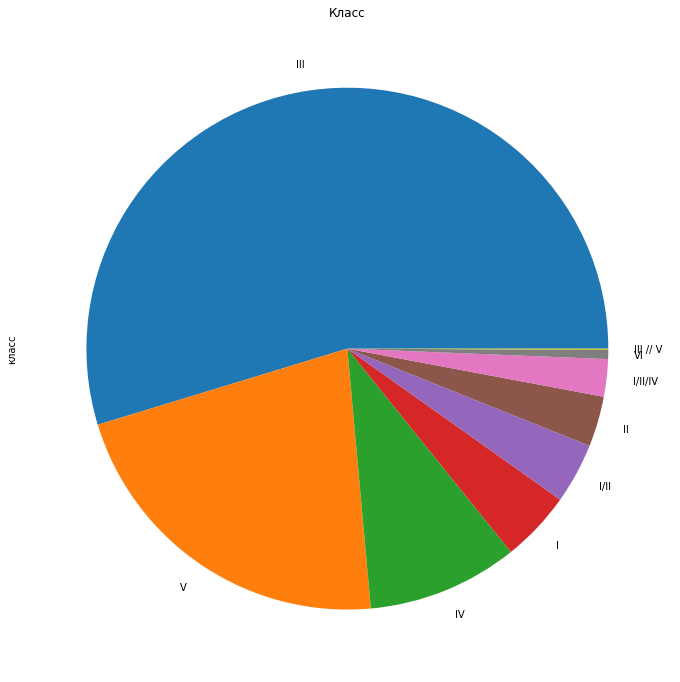

In [69]:
# То же самое, но в виде пайчарта. 
# Возможно, на этой картинке более наглядно видно соотношение, однако я считаю предыдущий график более уместным, так как он показывает ещё и абсолютное число вхождений существительных каждого класса в таблицу.
plt.figure(figsize=(12, 12))
sul_nouns['класс'].value_counts().plot(kind='pie');
plt.title('Класс');

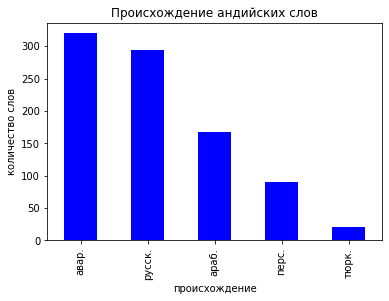

In [85]:
# В диссертации (Алисултанова) автор даёт информацию о происхождении андийских слов. Эта информация находится в моей таблице в стобце "комментарии".
# Из столбца "комментарии" я выбираю информацию о том, откуда заимствовано то или иное слово, если она есть. (На самом деле, там есть ещё комментарии вида "заимствовано из арабского через аварский", но я не стала учитывать их в этом графике для простоты картинки) 
# График показывает, что аварских и русских заимствований в андийском языке больше всего, что логично с точки зрения социолингвистической ситуации в андийских сёлах.
# Далее идут арабские, персидские и тюркские заимствования. 
# Однако все эти результаты, как я уже писала выше, весьма предварительные.
borr = ali[ali.комментарии.isin(('авар.', 'русск.', 'араб.', 'перс.', 'тюрк.'))]
borr['комментарии'].value_counts().plot.bar(color='blue'); 
plt.title('Происхождение андийских слов')
plt.xlabel('происхождение')
plt.ylabel('количество слов');

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


         страница                                              слово перевод  \
132  51, 139, 167  бехмугъул // мехмугъул // беххмугъол // меххму...  курдюк   

    класс                            pl  obl пример комментарий  length  
132   III  беххмугъолол // меххмугъолол  NaN    NaN         NaN      50  


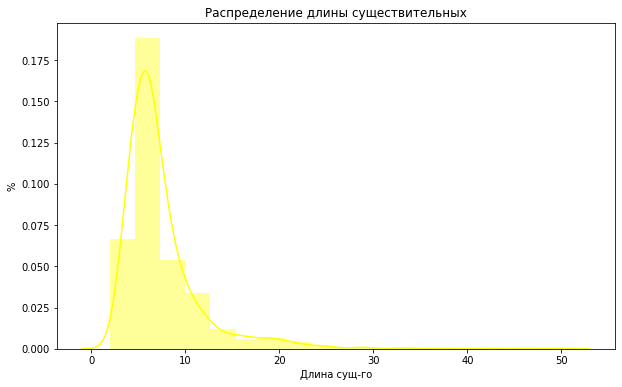

In [97]:
# Построим график распределения длины андийских существительных. Одна переменная => подходит гистограмма.
import seaborn as sns
sul_nouns['length'] = sul_nouns['слово'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(sul_nouns['length'], bins=18, color='yellow')
plt.title('Распределение длины существительных')
plt.ylabel('%')
plt.xlabel('Длина сущ-го');
# Но что это за слово из 50 символов?
print(sul_nouns[sul_nouns['length']==50])
# А это просто в одной ячейке перечислено много вариантов одного слова, встреченных в диссертации.
# И такое встречается в таблице регулярно, поэтому выводы никакие на этих данных лучше не делать.

In [100]:
conn.commit()
conn.close()